In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

lis = []

for i in range(7,-1,-1):
    res = b'\x01'[0]<<i
    lis.append(res)

In [6]:
def write_img(img,msg):
    msg_string = '^START:' + str(len(msg))+ ':' + msg
    sa,sb,sc = img.shape
    a,b,c = 0,0,0
    
    for s in s_string:
        for i in lis:
            # ord(s) return the ASCII value of the charecter s
            if ord(s) & i == 0:
                # Check if the first bit is not zero
                if img[a][b][c]%2 != 0:
                    img[a][b][c] -= 1
            else:
                #check if first bit is not one
                if img[a][b][c]%2 == 0:
                    img[a][b][c] += 1
                    
            if a<sa-1:
                a += 1

In [203]:
def read_imgn(img,a,b,c,n):
    str = []
    # Reading in chunks of n chars
    
    for i in range(n):
        ch = 0
        for j in lis:
            num = img[a][b][c]
            if num%2 != 0:
                ch += j
            a += 1
        str.append(chr(ch))
    
    return str


def read_img(img):
    # Check if the start string is present
    res = read_imgn(img,0,0,0,7)
    res = "".join(res)
    if res != "^START:":
        print("No Message Here!  ",res)
        return ""
    
    # Reading the length of the message
    a,b,c = 8*7,0,0
    dig = []
    flag = 0
    for i in range(100):
        if flag == 1:
            break
        ch = 0
        for j in lis:
            num = img[a][b][c]
            if num%2 != 0:
                ch += j
            a += 1
        if ch == ord(':'):
            flag = 1
            break
        else:
            dig.append(chr(ch))
            
    
    # read message
    na = (8+len(dig))*8
    dig = int(''.join(dig))
    res = read_imgn(img,na,0,0,dig)
    return ''.join(res)

In [204]:
img = Image.open('pup.jpg')
arro = np.asarray(img).copy()

msg = 'I hate ya cause you hate Dolittle, just kidding, stupid movie'

write_img(arro,msg)
read_img(arro)

'its a message'

In [68]:
print(arro[0,0:8,0])
print(arro[0,8:16,0])

[94 97 98 99 99 99 99 98]
[94 97 98 97 94 92 95 97]


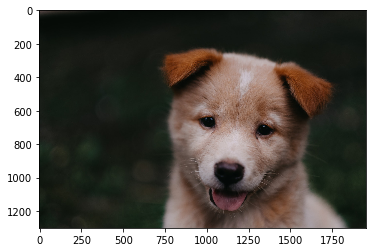

In [72]:
plt.imshow(arro)

In [175]:
im = Image.fromarray(arro)
im.save('output.png')

In [5]:
out = Image.open('output.png')
imarr = np.asarray(out).copy() 
imarr.shape

(1300, 1950, 3)